## CAR PRICE PREDICTION

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [92]:
df = pd.read_csv('/content/car+data.csv')


In [93]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [94]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


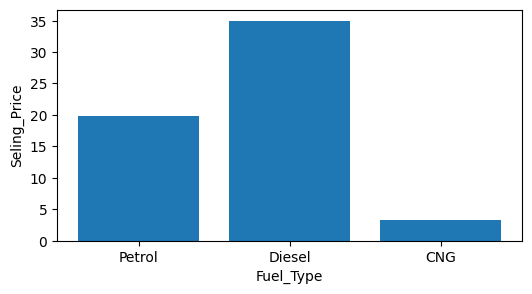

In [96]:
plt.figure(figsize=(6,3))
plt.bar(df['Fuel_Type'] , df['Selling_Price'])
plt.xlabel('Fuel_Type')
plt.ylabel("Seling_Price")
plt.show()

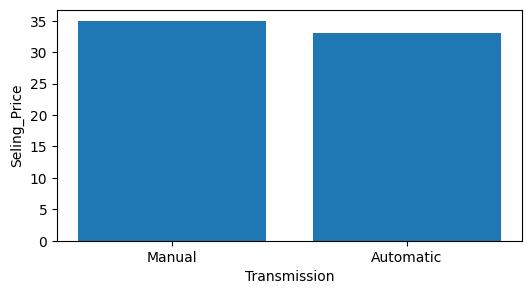

In [97]:
plt.figure(figsize=(6,3))
plt.bar(df['Transmission'] , df['Selling_Price'])
plt.xlabel('Transmission')
plt.ylabel("Seling_Price")
plt.show()

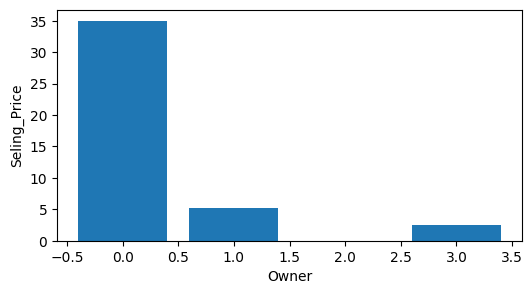

In [98]:
plt.figure(figsize=(6,3))
plt.bar(df['Owner'] , df['Selling_Price'])
plt.xlabel('Owner')
plt.ylabel("Seling_Price")
plt.show()

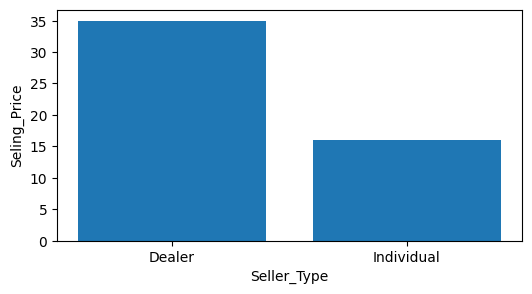

In [99]:
plt.figure(figsize=(6,3))
plt.bar(df['Seller_Type'] , df['Selling_Price'])
plt.xlabel('Seller_Type')
plt.ylabel("Seling_Price")
plt.show()

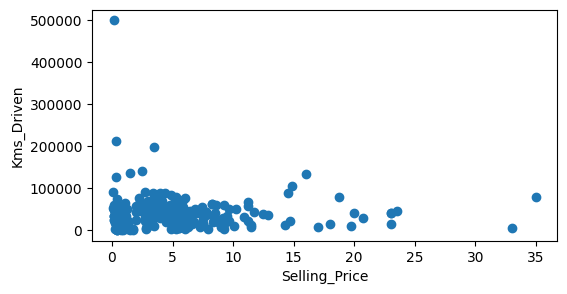

In [100]:
plt.figure(figsize=(6,3))
plt.scatter( df['Selling_Price'],df['Kms_Driven'])
plt.xlabel('Selling_Price')
plt.ylabel("Kms_Driven")
plt.show()

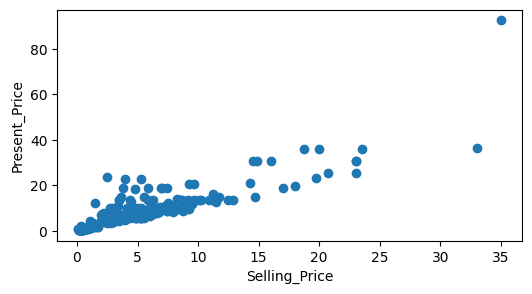

In [101]:
plt.figure(figsize=(6,3))
plt.scatter( df['Selling_Price'],df['Present_Price'])
plt.xlabel('Selling_Price')
plt.ylabel('Present_Price')
plt.show()

In [102]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [103]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [104]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [105]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

ONE HOT ENCODING

In [106]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [107]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [108]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [109]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [110]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)

In [111]:
y = df['Selling_Price']

In [112]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [113]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1) Liner Regressor model

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

In [117]:
y_pred

array([ 2.96670467,  8.3025584 ,  6.05620758, -1.46814968,  9.25713882,
        7.032306  ,  1.35164871,  0.8268692 ,  1.37173108,  7.10742891,
        8.74382695,  0.58613312,  8.50347194,  3.42803571,  6.50183791,
        3.08701389,  0.46323861, 10.8959559 ,  1.76487652,  2.36736645,
        0.37538646,  7.73247978,  6.2075281 ,  2.64722707,  0.78232086,
        3.72073841,  5.33393873,  2.83824054,  2.16090172,  1.77220708,
        0.37859447,  8.79078642, -0.7007019 ,  2.2988819 ,  8.21516023,
        4.54037167,  7.35322104,  7.6823757 ,  2.91768184,  8.08080852,
        3.99669454,  4.34672417,  4.36388106,  0.61018923,  6.94478948,
        0.47281585,  7.41596672, 11.44059317,  3.14822313,  4.95097368,
        6.86250813,  2.19862524, 20.53946595, 16.79146986,  7.13952545,
        9.830903  ,  4.49886186,  8.62078376,  1.810855  ,  7.67299866,
        0.21098592])

In [118]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

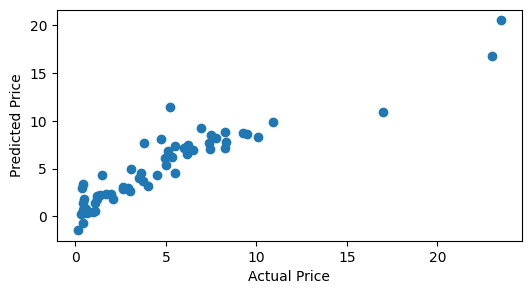

In [119]:
plt.figure(figsize=(6,3))
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

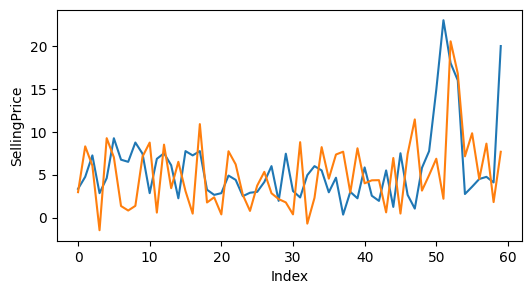

In [120]:
plt.figure(figsize=(6,3))
plt.plot(df.index[:60] , df['Selling_Price'][:60])
plt.plot(df.index[:60] , y_pred[:60])
plt.xlabel('Index')
plt.ylabel("SellingPrice")

plt.show()

In [121]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 1.2217615462334326


In [122]:
r2=r2_score(y_test, y_pred)
print('R squared error:', r2)

R squared error: 0.8468053957655798


 2) Lasso regression model

In [123]:
las_regr_model=Lasso()

In [124]:
las_regr_model.fit(X_train,y_train)


Lasso()

In [125]:
training_data_prediction=las_regr_model.predict(X_test)

In [126]:
#R squared error
error_score=metrics.r2_score(y_test,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.798551246128469


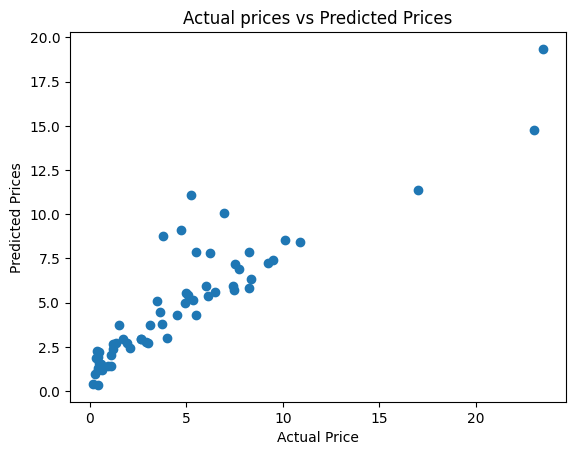

In [127]:
plt.scatter(y_test,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

3) RANDOM FORREST REGRESSOR

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9656364606727075

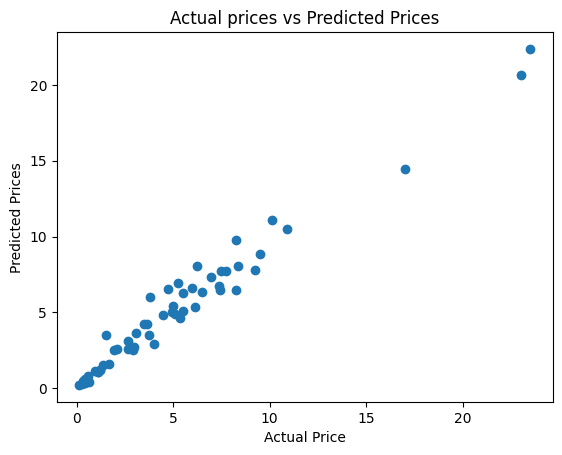

In [129]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual prices vs Predicted Prices")
plt.show()

###even from this points plot we can see that almost all the points are along the
###line y=x which says that the predicted and the y_test values are smae

In [130]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf, file)
#we use a pickle file to store the data in a byte stream format

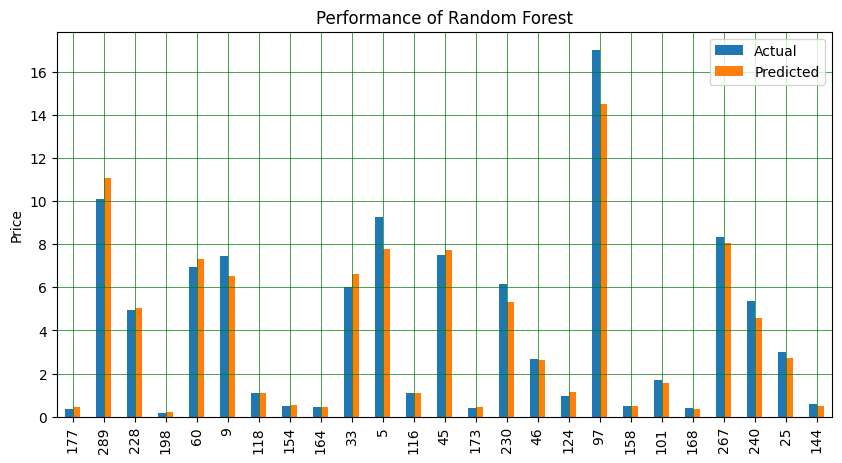

In [133]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Price')
plt.show()

In [135]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse_predict = round(mean_squared_error(y_test,y_pred),4)
mae_predict = round(mean_absolute_error(y_test,y_pred),4)
print ('MSE is:'+str(mse_predict))
print ('MAE is:'+str(mae_predict))

MSE is:0.7916
MAE is:0.5985


In [136]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
cutoff = 1.8                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)
y_test_classes = np.zeros_like(y_pred)     # initialise a matrix full with zeros
y_pred_classes[abs(y_test - y_pred) > cutoff] = 1

In [137]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

Text(0.5, 1.0, 'Confusion Matrix')

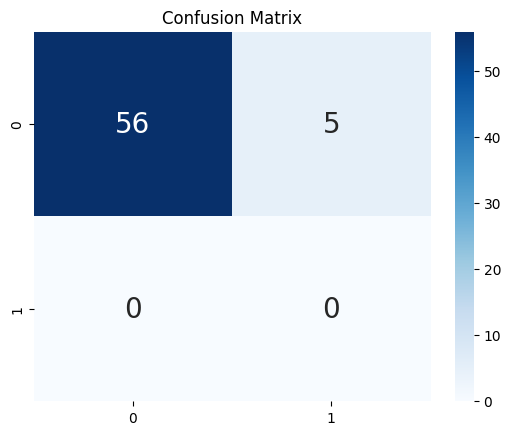

In [138]:
df_cm = cm
sns.heatmap(df_cm,annot=True,cmap="Blues" ,annot_kws={"size": 20})
plt.title('Confusion Matrix')

In [139]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test_classes, y_pred_classes)
print(matrix)

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        61
         1.0       0.00      0.00      0.00         0

    accuracy                           0.92        61
   macro avg       0.50      0.46      0.48        61
weighted avg       1.00      0.92      0.96        61



In [140]:
from sklearn.metrics import accuracy_score
s = accuracy_score(y_test_classes,y_pred_classes)
print("accuracy of the model : {}" . format(s))

accuracy of the model : 0.9180327868852459


The best score reaches third model